<a href="https://colab.research.google.com/github/Jonny-T87/Dojo-Work/blob/main/Analysis_of_KMeans_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jonny Tesfahun

- 07/19/22

##Analysis of KMeans (Core)

Task
1. Make a copy of your code file from KMeans Exercise Part 1.


##Part 1:


Loading and Cleaning Data:

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [23]:
customer = pd.read_csv('/content/drive/MyDrive/DojoBootCamp/Project Files/cust_seg.csv')
df = customer[{'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio'}]
df.head()

,Card Debt,Income,Edu,Other Debt,Defaulted,Age,Years Employed,DebtIncomeRatio
0,0.124,19,2,1.073,0.0,41,6,6.3
1,4.582,100,1,8.218,0.0,47,26,12.8
2,6.111,57,2,5.802,1.0,33,10,20.9
3,0.681,19,2,0.516,0.0,29,4,6.3
4,9.308,253,1,8.908,0.0,47,31,7.2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Card Debt        850 non-null    float64
 1   Income           850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Other Debt       850 non-null    float64
 4   Defaulted        700 non-null    float64
 5   Age              850 non-null    int64  
 6   Years Employed   850 non-null    int64  
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [25]:
#checking duplicates
df.duplicated().sum()

0

In [26]:
#checked NaN
df.isna().sum()

Card Debt            0
Income               0
Edu                  0
Other Debt           0
Defaulted          150
Age                  0
Years Employed       0
DebtIncomeRatio      0
dtype: int64

In [27]:
#checking value counts
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [28]:
#droping NaN because less than 17% of the data
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [29]:
#making sure NaN are dropped 
df.isna().sum()

Card Debt          0
Income             0
Edu                0
Other Debt         0
Defaulted          0
Age                0
Years Employed     0
DebtIncomeRatio    0
dtype: int64

Inertia - Elbow Plot:

In [30]:
#setting scaler
scaler = StandardScaler()

In [31]:
# Fit & transform dataframe
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [32]:
#checking scaled dataframe
scaled_df.head()

,Card Debt,Income,Edu,Other Debt,Defaulted,Age,Years Employed,DebtIncomeRatio
0,-0.675699,-0.723102,0.298793,-0.604284,-0.594950,0.768304,-0.359007,-0.580528
1,1.431421,1.478707,-0.779325,1.570620,-0.594950,1.519090,2.647029,0.372222
2,2.154119,0.309845,0.298793,0.835201,1.680814,-0.232744,0.242201,1.559495
3,-0.412427,-0.723102,0.298793,-0.773833,-0.594950,-0.733267,-0.659610,-0.580528
4,3.665215,5.637681,-0.779325,1.780653,-0.594950,1.519090,3.398538,-0.448609


In [33]:
#Creating an empty list of inertias
#Loop through k values between 2 and 11 and store the inertias in the list.
inertias = []

for k in range(2,12):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)

Text(0, 0.5, 'inertia')

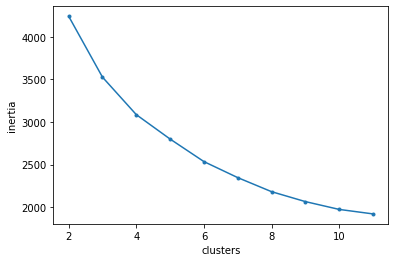

In [34]:
#Visualizing scores
plt.plot(range(2,12), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

1. Elbow Plot of inertia shows that elbow may be between 2 and 3. Thus, the graph starts to level off at those clusters.

Silhouette Score - KMeans:

In [35]:
# Saving silhouette scores for various cluster numbers in list between 2-11
kmeans_silhouette_scores = []
for i in range(2, 12):
  kmeans = KMeans(n_clusters = i, random_state=10)
  kmeans.fit(scaled_df)
  kmeans_silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))


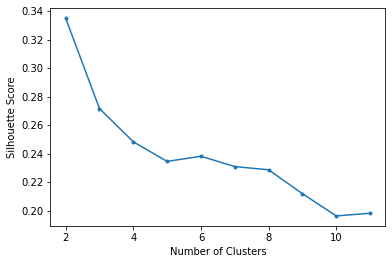

In [36]:
# Visualize scores
plt.plot(range(2, 12), kmeans_silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

1. The Silhouette Score gives another suggestion for clustering than the elbow plot of inertias. This is showing that between 2 and 3 as clusters, 2 is the best option.

Choosing K based on the Results:

In [39]:
#Silhouette score for Cluster 2, Since above data shows that is the best option
kmeans = KMeans(n_clusters=2, random_state=10)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.33496643365707623

##Analysis of KMeans:

2. Make bar graphs of the means of each feature for each cluster that you created in part 1 of the assignment.  For each plot the X axis should be the clusters and the y axis should be the mean values for each feature.

3. Write a description of each cluster, based on the graphs and tables you created.

4. Submit your notebook below.

In [38]:
#checking min, max, and avg
df.describe()

,Card Debt,Income,Edu,Other Debt,Defaulted,Age,Years Employed,DebtIncomeRatio
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,1.553566,45.601429,1.722857,3.058196,0.261429,34.860000,8.388571,10.260571
std,2.117196,36.814226,0.928206,3.287550,0.439727,7.997342,6.658039,6.827234
min,0.012000,14.000000,1.000000,0.046000,0.000000,20.000000,0.000000,0.400000
25%,0.368750,24.000000,1.000000,1.044000,0.000000,29.000000,3.000000,5.000000
50%,0.855000,34.000000,1.000000,1.987500,0.000000,34.000000,7.000000,8.600000
75%,1.901750,55.000000,2.000000,3.923250,1.000000,40.000000,12.000000,14.125000
max,20.561000,446.000000,5.000000,27.034000,1.000000,56.000000,31.000000,41.300000


In [41]:
#adding cluster row
kmeans = KMeans(n_clusters=2, random_state=10)
kmeans.fit(scaled_df)
df['cluster'] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [42]:
#Checking if cluster column was added 
df.head()

,Card Debt,Income,Edu,Other Debt,Defaulted,Age,Years Employed,DebtIncomeRatio,cluster
0,0.124,19,2,1.073,0.0,41,6,6.3,1
1,4.582,100,1,8.218,0.0,47,26,12.8,0
2,6.111,57,2,5.802,1.0,33,10,20.9,0
3,0.681,19,2,0.516,0.0,29,4,6.3,1
4,9.308,253,1,8.908,0.0,47,31,7.2,0


In [43]:
#creating group by of clusters for analyzing the avg
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Card Debt,Income,Edu,Other Debt,Defaulted,Age,Years Employed,DebtIncomeRatio
0,0,3.886994,88.238994,1.955975,7.257063,0.301887,41.855346,15.503145,14.754717
1,1,0.867771,33.070240,1.654344,1.824148,0.249538,32.804067,6.297597,8.939741


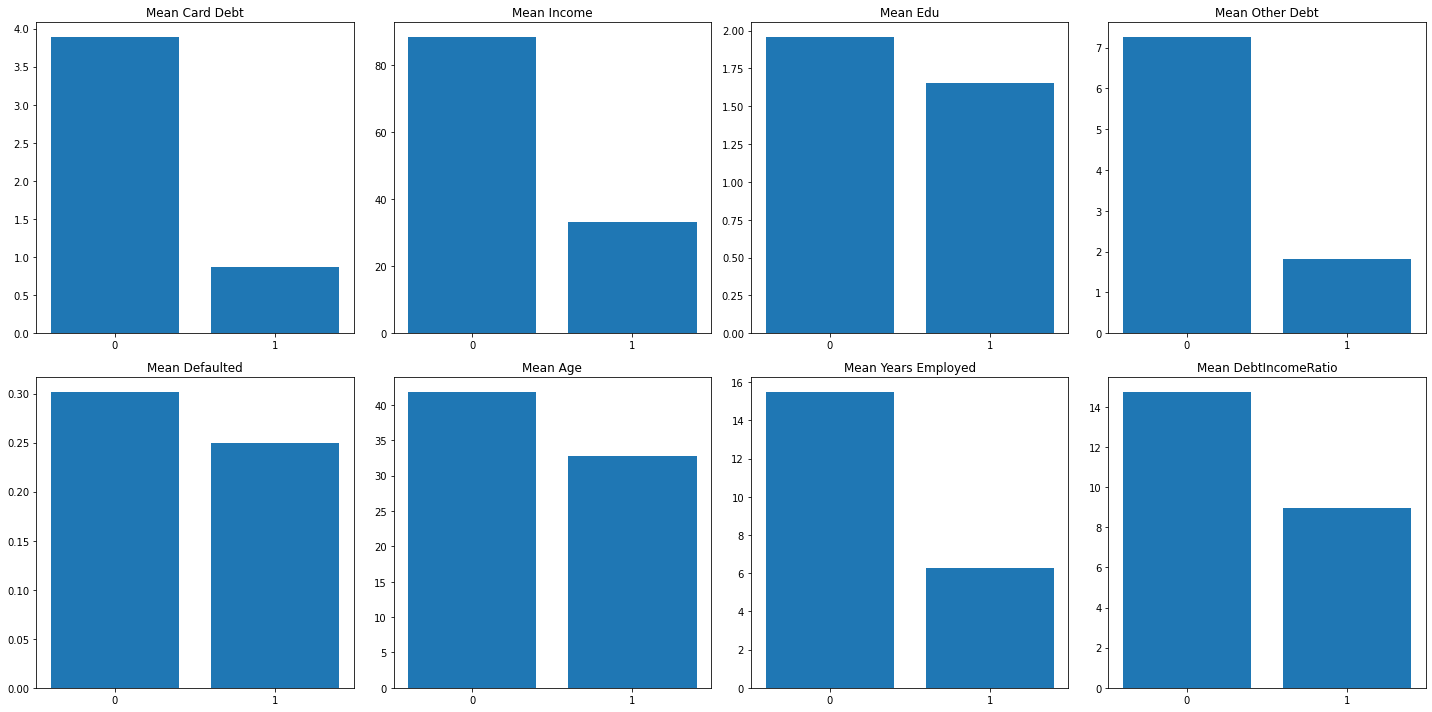

In [57]:
#Making bar graphs of the means of each feature for each cluster for Visual
fig, axes = plt.subplots(2,4, figsize=(20,10))
axes = axes.ravel()

for g, col in enumerate(cluster_groups.columns[1:]):
  axes[g].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[g].set_title(f'Mean {col}')
  axes[g].set_xticks(cluster_groups['cluster'])
  plt.tight_layout();

From the visual bar plots, we can see that there are unique features of customer groups that could help the marketing department. But first there are a few close similarities. These include avg. Education and avg. Default on Debt. Both of these features are close enough for both customer clusters that it can be somewhat ignored in this visual presentation. 

For customers in cluster 0, we can see that these customers are older with avg age being over 40 years old and their avg. year of employment is over 14 years which is high. There avg. income is also high being over $80k. However, their Card Debt and Other Debt is very high compared to customers in cluster 1. The bar graphs also show that this group has a high avg. Debt-to-Income Ratio and are more likely to be Defaulted. This means customer group 0 is more likely to purchase something on debt knowing that they don't have the money to pay for it just yet. Seems to be a pay check to pay check purchasing style. 

For customers in cluster 1, we can see that these customers are younger with avg age being just over 30 years old and their avg. year of employment is 6 years.
That is the complete opposite of the other customer group. Also, their avg. income is also very low being under $40k. However, their Card Debt and Other Debt is also very low compared to customers in cluster 1. In addition, their Debt-to-Income Ratio is also low. This means customers in group 1 spend within their means.

Based on this information, the marketing team should focus their advertisement on customers in cluster group 0. The biggest reason being is that these customers are more likely to spend on things they like and do not care if that puts them in more debt or not. 